# 如何创建箱线图

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

## 1. 创建基础箱线图

箱线图(box-plot): 描述数值变量分布的统计图表，使用的样本统计量包括最小值，最大值，中位数，25%分位数(下四分位数)，75%分位数(上四分位数)。在箱线图中，x轴表示数据的类别，y轴表示数据的分布。

Matplotlib创建箱线图的接口：**boxplot(x, notch, vert, patch_artist, whis, widths, labels)**

参数：

* x: 包含数值变量的数组(一个箱体)，或包含多个向量的数组(多个箱体)
* notch: True -> 锯齿形箱体，False -> 矩形箱体
* vert: True -> 垂直箱体，False -> 水平箱体
* patch_artist: True -> 用Patch Artist而不是Line2D创建箱体，前者可以高度定制箱体的样式
* whis: 浮点值或包含两个浮点值的元组，默认为1.5，控制须线的位置
    + 浮点值，箱体下方的须线 = $Q1 - whis*(Q3-Q1)$，箱体上方的须线 = $Q3 + whis*(Q3-Q1)$，Q1和Q3分别是25%分位数和75%分位数
    + 包含浮点值的元组，(5.0, 95.0)表示须线覆盖5%分位数到95%分位数，(0, 100)表示覆盖最小值到最大值
* widths: 浮点值或浮点值数组，设置箱体的宽度，默认为0.5
* labels: 每个箱体的标签，长度和x相同

Text(0.5, 1.0, 'Basic Box-Plot')

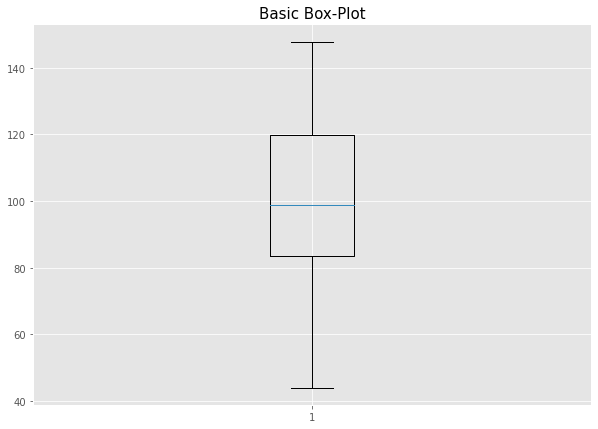

In [2]:
np.random.seed(123)

x = np.random.normal(100, 20, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(x)
ax.set_title("Basic Box-Plot", fontsize=15)

一般情况下，箱线图用于对比多个数值变量的分布。

Text(0.5, 1.0, 'Comparison of Distributions for multiple variables')

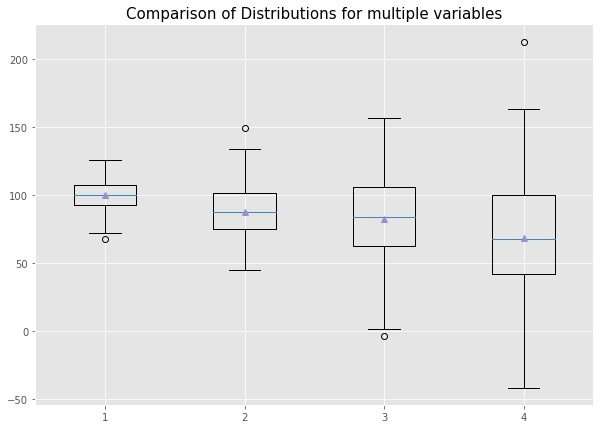

In [6]:
np.random.seed(123)

arr_1 = np.random.normal(100, 10, 200)
arr_2 = np.random.normal(90, 20, 200)
arr_3 = np.random.normal(80, 30, 200)
arr_4 = np.random.normal(70, 40, 200)
arrs = [arr_1, arr_2, arr_3, arr_4]

fig, ax = plt.subplots(figsize=(10, 7))
bp = ax.boxplot(arrs, showmeans=True)  # 设置showmeans=True可以添加均值到箱体中
ax.set_title("Comparison of Distributions for multiple variables", fontsize=15)

## 2. 调整箱线图的样式

boxplot()返回一个包含所有几何图形对象的字典，通过调用相应对象的set方法，可以高度定制箱线图的样式。

In [8]:
# 查看boxplot()返回什么对象
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9b379aed60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9b379ba460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9b379aea00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9b379bab50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9b379c51f0>,
 'means': [<matplotlib.lines.Line2D at 0x7f9b379bae50>,
  <matplotlib.lines.Line2D at 0x7f9b3797d0d0>]}

Text(0.5, 1.0, 'Custom Boxplot')

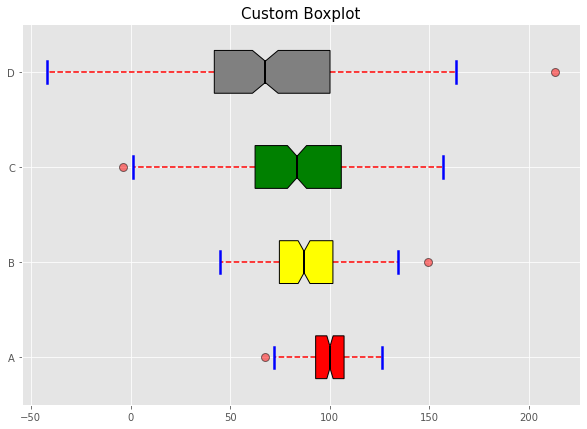

In [9]:
np.random.seed(123)

arr_1 = np.random.normal(100, 10, 200)
arr_2 = np.random.normal(90, 20, 200)
arr_3 = np.random.normal(80, 30, 200)
arr_4 = np.random.normal(70, 40, 200)
arrs = [arr_1, arr_2, arr_3, arr_4]

fig, ax = plt.subplots(figsize=(10, 7))

# 创建箱线图
bp = ax.boxplot(
    x=arrs,
    patch_artist=True,  # 用Patch Artist而不是Line2D Artist创建箱体
    notch=True,  # 锯齿形箱体
    vert=False  # 水平箱线图
)

# 设置箱体颜色
# boxplot不提供color参数，要设置箱体颜色，首先要从boxplot()返回的结果中
# 获取Patch Artists对象，然后再调用set_color()
colors = ["red", "yellow", "green", "gray"]
for patch, color in zip(bp["boxes"], colors):
    # set_facecolor: 设置箱体内部颜色
    # set_edgecolor: 设置箱体边框颜色
    # set_color: 设置箱体内部和边框的颜色
    patch.set_facecolor(color)
    
# 设置须线的形状，大小，颜色
for whisker in bp["whiskers"]:
    whisker.set(
        color="red",
        linestyle="dashed",
        linewidth=1.5
    )
    
# 设置须线帽檐(caps)的样式
for cap in bp["caps"]:
    cap.set(
        color="blue",
        linewidth=2.5
    )
    
# 设置中位数的样式
for median in bp["medians"]:
    median.set(
        color="black",
        linewidth=2.0
    )
    
# 设置极值点的样式，超出帽檐的点就是极值点
for flier in bp["fliers"]:
    flier.set(
        marker="o",
        markersize=8,
        markerfacecolor="red",
        alpha=0.5
    )
    
# 设置y轴标签和标题
ax.set_yticklabels(["A", "B", "C", "D"])
ax.set_title("Custom Boxplot", fontsize=15)